<a href="https://colab.research.google.com/github/vasuans/Tensorflow-Projects/blob/master/CNN_using_TensorFlow2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tensorflow and other libraries**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt

importing FashionMNIST from Tensorflow datasets

In [ ]:
data = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = data.load_data()

**Normalizing data**

In [ ]:
x_train,x_test = x_train/255.0,x_test/255.0

In [ ]:
print(x_train.shape)

(60000, 28, 28)


**Shape need to be modified from (N,W,D) to (N,W,D,1) so that CNN can take it as input**

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


**Building model**

In [ ]:
print(x_train[0].shape)

(28, 28, 1)


In [ ]:
K = len(set(y_train))
print(K)

10


In [ ]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation = 'relu')(i)
x = Conv2D(64,(3,3),strides=2,activation = 'relu')(x)
x = Conv2D(128,(3,3),strides=2,activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

In [ ]:
model = Model(i,x)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
model.compile(optimizer='adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'] )
r = model.fit(x_train,y_train,validation_data= (x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5416 - accuracy: 0.7984 - val_loss: 0.3990 - val_accuracy: 0.8524
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3771 - accuracy: 0.8572 - val_loss: 0.3695 - val_accuracy: 0.8616
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3300 - accuracy: 0.8752 - val_loss: 0.3270 - val_accuracy: 0.8802
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968 - accuracy: 0.8887 - val_loss: 0.3050 - val_accuracy: 0.8895
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2751 - accuracy: 0.8954 - val_loss: 0.3035 - val_accuracy: 0.8928
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2546 - accuracy: 0.9053 - val_loss: 0.2995 - val_accuracy: 0.8907
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2404 - accuracy: 0.9084 - val_loss: 0.2923 - val_accuracy:

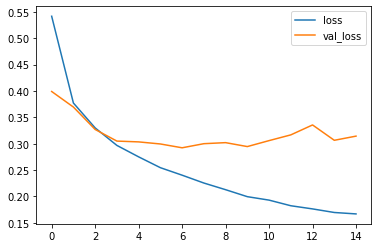

In [ ]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

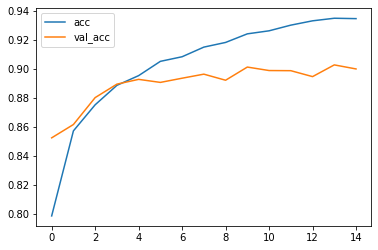

In [ ]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()